# Performance Test Analysis

### Setup

In [1]:
from util import *

### Load data

In [2]:
all_data = load_data("data")
max_depth_data = all_data.loc[all_data['depth'] == 6]

Loaded test cases: 
  data\base.csv
  data\it_nimo.csv
  data\noalloc.csv
  data\turbo1.csv
  data\turbo2.csv
  data\turbo3.csv
  data\turbo4.csv
  data\turbo5.csv


#### Remove test cases

In [3]:
sessions_to_remove = [
    "noalloc",
    "it_nimo"
]

max_depth_data = remove_sessions(max_depth_data, sessions_to_remove)

## Search time

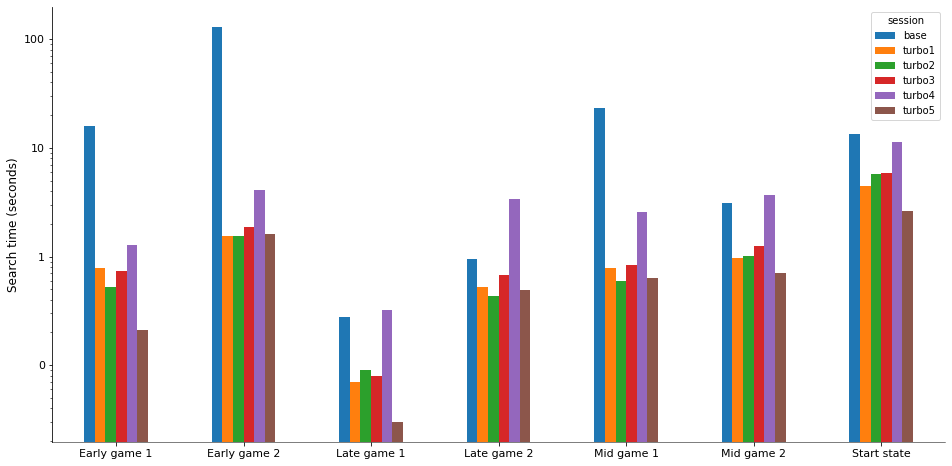

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,15.85,130.27,0.28,0.95,23.36,3.11,13.41
turbo1,0.78,1.53,0.07,0.52,0.79,0.97,4.46
turbo2,0.52,1.55,0.09,0.43,0.60,1.02,5.79
turbo3,0.73,1.88,0.08,0.68,0.83,1.26,5.84
turbo4,1.28,4.13,0.32,3.36,2.59,3.67,11.36
turbo5,0.21,1.61,0.03,0.49,0.64,0.70,2.64


In [4]:
bar_chart(max_depth_data.pivot('case_name','session', 'time'), ylabel="Search time (seconds)", logscale='log') 
display(max_depth_data.pivot('session','case_name','time'))

## Nodes visited

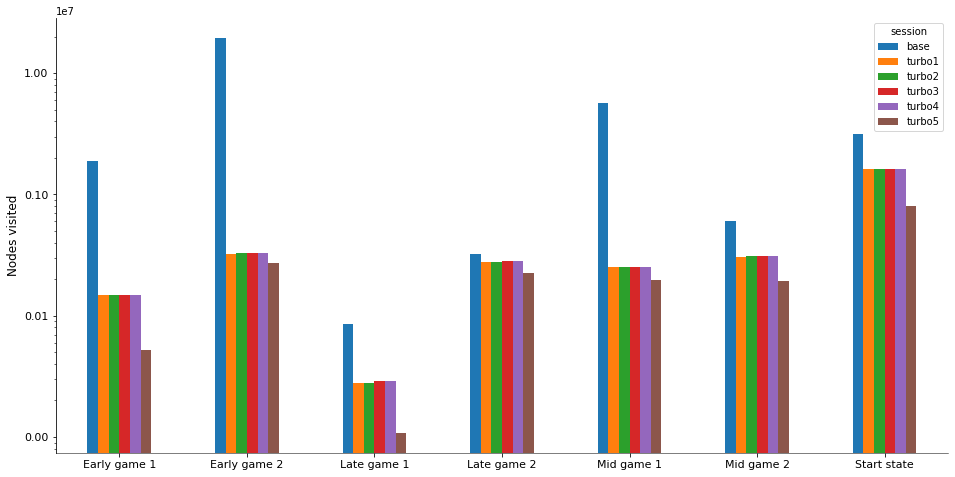

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,1882719,19632972,85467,325669,5627462,609601,3135482
turbo1,147491,322207,27669,275981,253131,307714,1616463
turbo2,148015,332132,28055,276190,253388,308139,1616464
turbo3,148015,332132,28850,280213,253043,309990,1616464
turbo4,148015,332132,28850,280213,253043,309990,1616464
turbo5,52569,272023,10777,224354,197861,193585,810305


In [5]:
bar_chart(max_depth_data.pivot('case_name','session', 'nodes'), ylabel="Nodes visited", logscale=True)
display(max_depth_data.pivot('session','case_name','nodes'))

## Branching factor

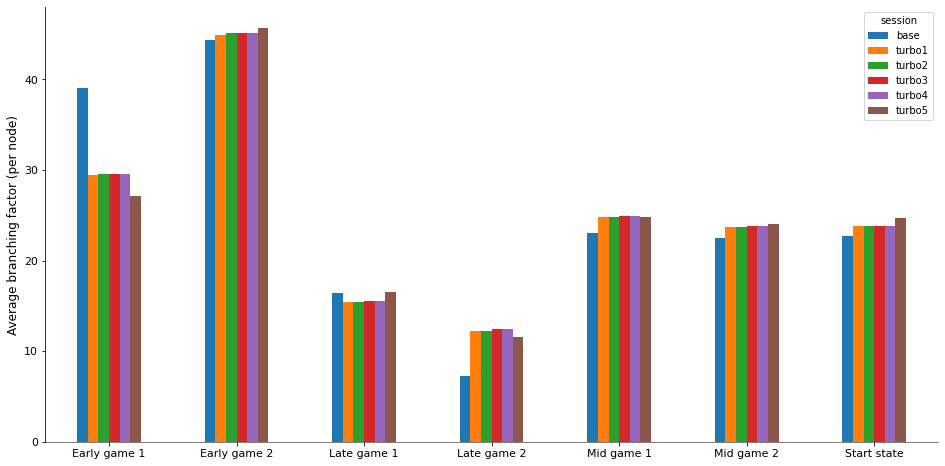

case_name,Early game 1,Early game 2,Late game 1,Late game 2,Mid game 1,Mid game 2,Start state
session,,,,,,,
base,39.00,44.29,16.47,7.30,23.04,22.52,22.70
turbo1,29.47,44.86,15.47,12.24,24.82,23.71,23.84
turbo2,29.51,45.06,15.44,12.26,24.85,23.71,23.84
turbo3,29.51,45.06,15.51,12.46,24.86,23.78,23.84
turbo4,29.51,45.06,15.51,12.46,24.86,23.78,23.84
turbo5,27.15,45.70,16.53,11.61,24.78,24.06,24.73


In [6]:
bar_chart(max_depth_data.pivot('case_name','session', 'branching'), ylabel="Average branching factor (per node)")
display(max_depth_data.pivot('session','case_name','branching'))

## Cutoff factor

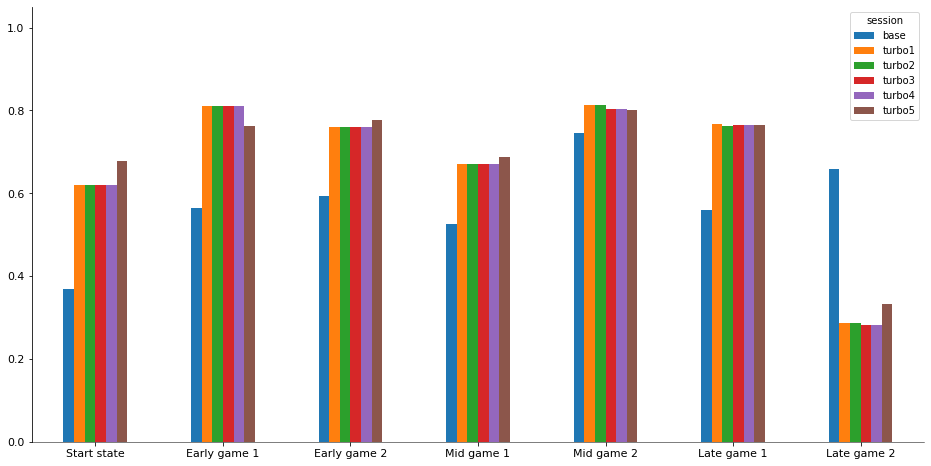

In [7]:
cutoff_chart(max_depth_data)

#bar_chart(max_depth_data.pivot('case_name','session', 'cutoffs'), ylabel="Average cutoffs (per node)")
#display(max_depth_data.pivot('session','case_name','cutoffs'))

## Dynamic Allocations

In [8]:
#bar_chart(max_depth_data.pivot('case_name','session', 'dynamic_allocs'), ylabel="Number of dynamic allocations")
#display(max_depth_data.pivot('session','case_name','dynamic_allocs'))

## Visited nodes per depth

__Note__: This is not the number of visited nodes on each depth, but the number of nodes visited when you do a search to the given depth.

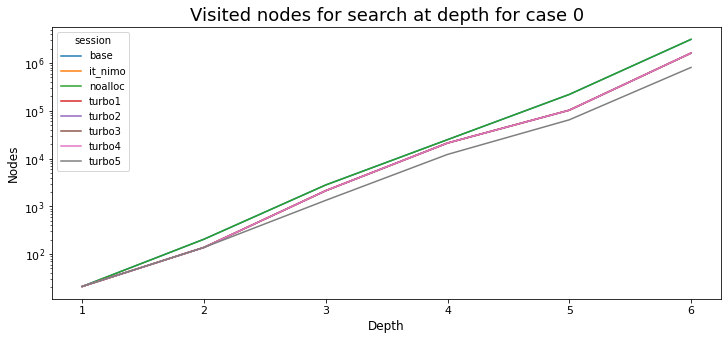

depth,1,2,3,4,5,6
session,,,,,,
base,21,205,2802,24888,220160,3135482
it_nimo,21,138,2126,21153,103048,1616463
noalloc,21,205,2802,24888,220160,3135482
turbo1,21,138,2126,21153,103048,1616463
turbo2,21,138,2126,21153,103048,1616464
turbo3,21,138,2126,21153,103048,1616464
turbo4,21,138,2126,21153,103048,1616464
turbo5,21,138,1335,12210,64782,810305


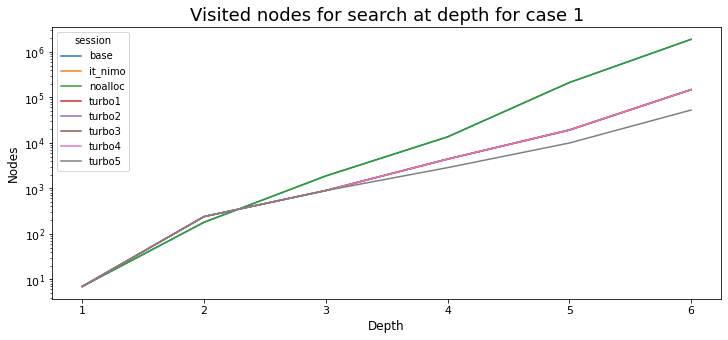

depth,1,2,3,4,5,6
session,,,,,,
base,7,180,1875,13531,211492,1882719
it_nimo,7,240,897,4400,19091,147491
noalloc,7,180,1875,13531,211492,1882719
turbo1,7,240,897,4400,19091,147491
turbo2,7,240,897,4400,19209,148015
turbo3,7,240,897,4400,19209,148015
turbo4,7,240,897,4400,19209,148015
turbo5,7,240,895,2853,9921,52569


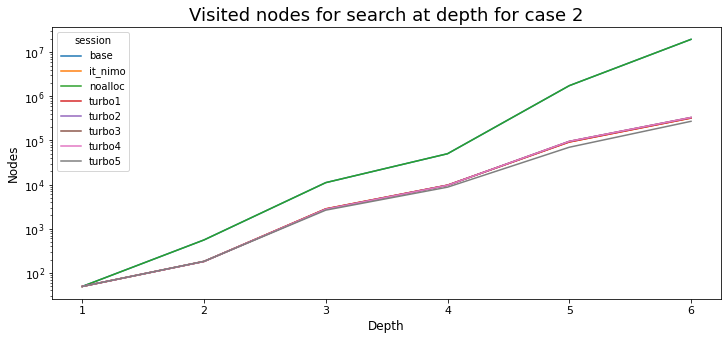

depth,1,2,3,4,5,6
session,,,,,,
base,49,556,11074,50063,1749425,19632972
it_nimo,49,181,2819,9712,92307,322207
noalloc,49,556,11074,50063,1749425,19632972
turbo1,49,181,2819,9712,92307,322207
turbo2,49,181,2763,9632,95458,332132
turbo3,49,181,2763,9632,95458,332132
turbo4,49,181,2763,9632,95458,332132
turbo5,49,182,2633,8740,70211,272023


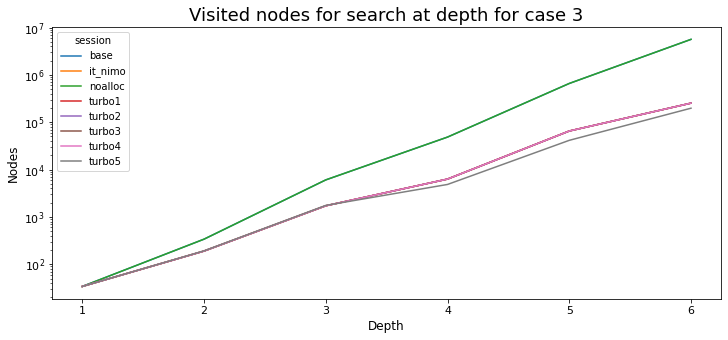

depth,1,2,3,4,5,6
session,,,,,,
base,34,339,6051,48567,658872,5627462
it_nimo,34,190,1718,6300,65255,253131
noalloc,34,339,6051,48567,658872,5627462
turbo1,34,190,1718,6300,65255,253131
turbo2,34,190,1718,6300,65186,253388
turbo3,34,190,1718,6300,65198,253043
turbo4,34,190,1718,6300,65198,253043
turbo5,34,192,1750,4850,41453,197861


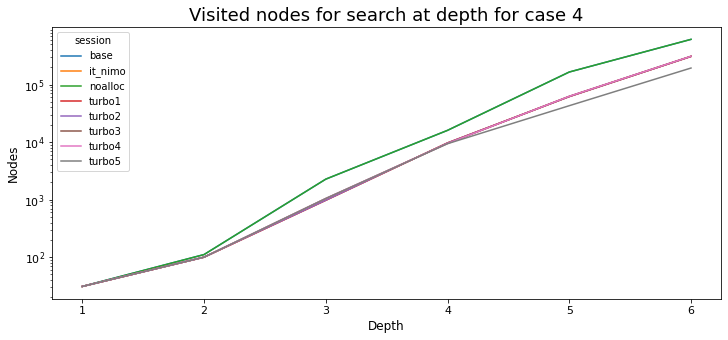

depth,1,2,3,4,5,6
session,,,,,,
base,31,111,2269,15987,164970,609601
it_nimo,31,100,975,9663,61752,307714
noalloc,31,111,2269,15987,164970,609601
turbo1,31,100,975,9663,61752,307714
turbo2,31,100,975,9663,61738,308139
turbo3,31,100,1045,9468,62467,309990
turbo4,31,100,1045,9468,62467,309990
turbo5,31,100,1046,9375,42874,193585


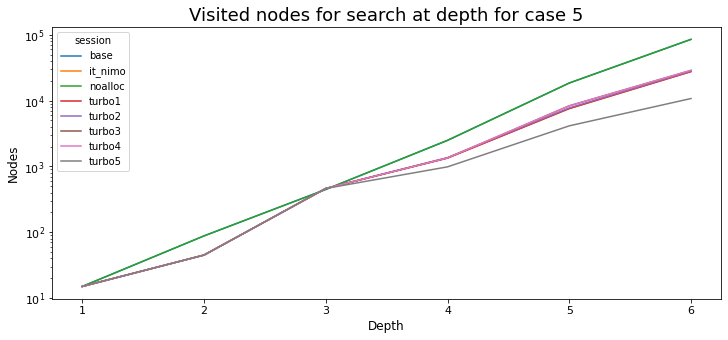

depth,1,2,3,4,5,6
session,,,,,,
base,15,88,447,2492,18544,85467
it_nimo,15,45,463,1342,7583,27669
noalloc,15,88,447,2492,18544,85467
turbo1,15,45,463,1342,7583,27669
turbo2,15,45,463,1363,7745,28055
turbo3,15,45,463,1347,8349,28850
turbo4,15,45,463,1347,8349,28850
turbo5,15,45,463,986,4142,10777


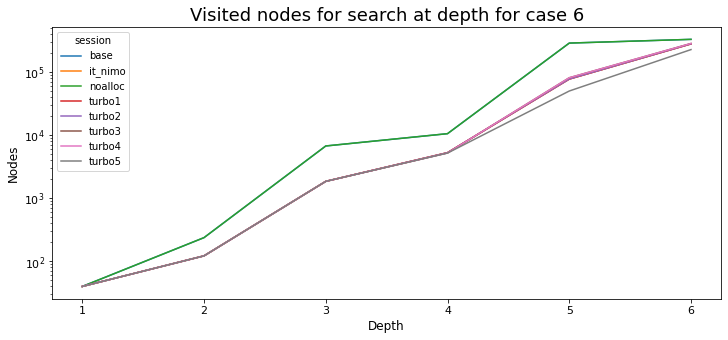

depth,1,2,3,4,5,6
session,,,,,,
base,40,237,6689,10474,284267,325669
it_nimo,40,122,1843,5243,76535,275981
noalloc,40,237,6689,10474,284267,325669
turbo1,40,122,1843,5243,76535,275981
turbo2,40,122,1843,5243,76619,276190
turbo3,40,122,1842,5189,80349,280213
turbo4,40,122,1842,5189,80349,280213
turbo5,40,122,1842,5168,49565,224354


In [9]:
visited_nodes_at_depth(all_data)